Why are our homes soo expensive? - https://kevinerdmann.substack.com/p/against-agglomeration-economies 

## Myth 1: Aggolomoration 

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df_uk_housing_starts = pd.read_excel('data/uklocalauthorityhousebuilding.xlsx', sheet_name='UK_Completions')
df_uk_housing_starts = df_uk_housing_starts.drop(columns=['2020-2021', '2021-2022', '2022-2023'])
df_uk_housing_starts = df_uk_housing_starts.replace('..', np.nan)
df_uk_housing_starts = df_uk_housing_starts.replace('-', np.nan)

/tmp/ipykernel_2118/2567828546.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_uk_housing_starts = df_uk_housing_starts.replace('-', np.nan)


In [4]:
df_starts_avg = pd.DataFrame()
df_starts_avg['starts_avg'] = df_uk_housing_starts.drop(columns=['Local Authority Name', 'Region or Country Name', 'Local Authority Code']).astype('float' ).mean(axis=1)
df_starts_avg['laname19'] = df_uk_housing_starts['Local Authority Name']

In [5]:
df_uk_local_pop = pd.read_csv('data/MYEB1_detailed_population_estimates_series_UK_(2019).csv')
df_uk_local_pop = df_uk_local_pop.groupby('laname19').sum().reset_index()
df_uk_local_pop.columns = df_uk_local_pop.columns.str.replace('population_', '')
df_uk_local_pop = df_uk_local_pop[df_uk_local_pop['2001']>150_000]
df_local_avg = df_uk_local_pop.filter(regex='20(0[9]|1[0-9])')

In [6]:
df_uk_local_gdp = pd.read_csv('data/gdp-by-local-authority-time-series-v2.csv')
df_uk_local_gdp = df_uk_local_gdp[df_uk_local_gdp['type-of-prices']=='gross-domestic-product-chained-volume-measures-per-head-annual-growth-rates']
df_uk_local_gdp = df_uk_local_gdp[df_uk_local_gdp['time'] > 2008 ]
df_uk_local_gdp = df_uk_local_gdp[df_uk_local_gdp['time'] < 2020 ]
df_uk_local_gdp_avg = df_uk_local_gdp.groupby('geography').mean(numeric_only=True).reset_index()
df_uk_local_gdp_avg['laname19'] = df_uk_local_gdp_avg['geography']


In [7]:
df_pop_avg = pd.DataFrame()
df_pop_avg['population_avg'] = df_local_avg.mean(axis = 1)
df_pop_avg['laname19'] = df_uk_local_pop['laname19']
df_big = df_pop_avg.merge(df_starts_avg, on = 'laname19')
df_big['avg_starts_per_capita'] = (df_big['starts_avg'] / df_big['population_avg'] ) * 1000
df_big = df_big.merge(df_uk_local_gdp_avg ,  on = 'laname19')

In [8]:
df_big['gdp_per_capita_growth'] = df_big['v4_1']
## made an error here, need to fix
df_big['avg_finishes_per_capita'] = df_big['avg_starts_per_capita']

In [9]:
df_uk_housing_starts

,Local Authority Code,Region or Country Name,Local Authority Name,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020
0,E06000001,North East,Hartlepool,230.0,150.0,190.0,170.0,170.0,360.0,350.0,160.0,230.0,330.0,170.0
1,E06000002,North East,Middlesbrough,320.0,NaN,330.0,220.0,210.0,430.0,510.0,430.0,420.0,470.0,510.0
2,E06000003,North East,Redcar and Cleveland,210.0,250.0,260.0,230.0,270.0,460.0,240.0,480.0,470.0,420.0,350.0
3,E06000004,North East,Stockton-on-Tees,630.0,580.0,500.0,640.0,520.0,460.0,450.0,690.0,980.0,780.0,990.0
4,E06000005,North East,Darlington,170.0,120.0,200.0,120.0,180.0,330.0,330.0,190.0,320.0,600.0,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,N09000007,Northern Ireland,Lisburn and Castlereagh,NaN,NaN,NaN,NaN,NaN,NaN,730.0,750.0,770.0,840.0,810.0
370,N09000008,Northern Ireland,Mid and East Antrim,NaN,NaN,NaN,NaN,NaN,NaN,340.0,350.0,400.0,620.0,390.0
371,N09000009,Northern Ireland,Mid Ulster,NaN,NaN,NaN,NaN,NaN,NaN,620.0,770.0,680.0,780.0,800.0
372,N09000010,Northern Ireland,"Newry, Mourne and Down",NaN,NaN,NaN,NaN,NaN,NaN,510.0,610.0,710.0,760.0,580.0


In [10]:
df_big = df_big.merge(df_uk_housing_starts, left_on='laname19', right_on='Local Authority Name')

In [27]:
df_big['avg homes built per 1000 ppl (2009-2019)'] = df_big['avg_finishes_per_capita']
df_big['avg per capita gdp growth (2009-2019)'] = df_big['gdp_per_capita_growth']
df_big['Region'] = df_big['Region or Country Name']

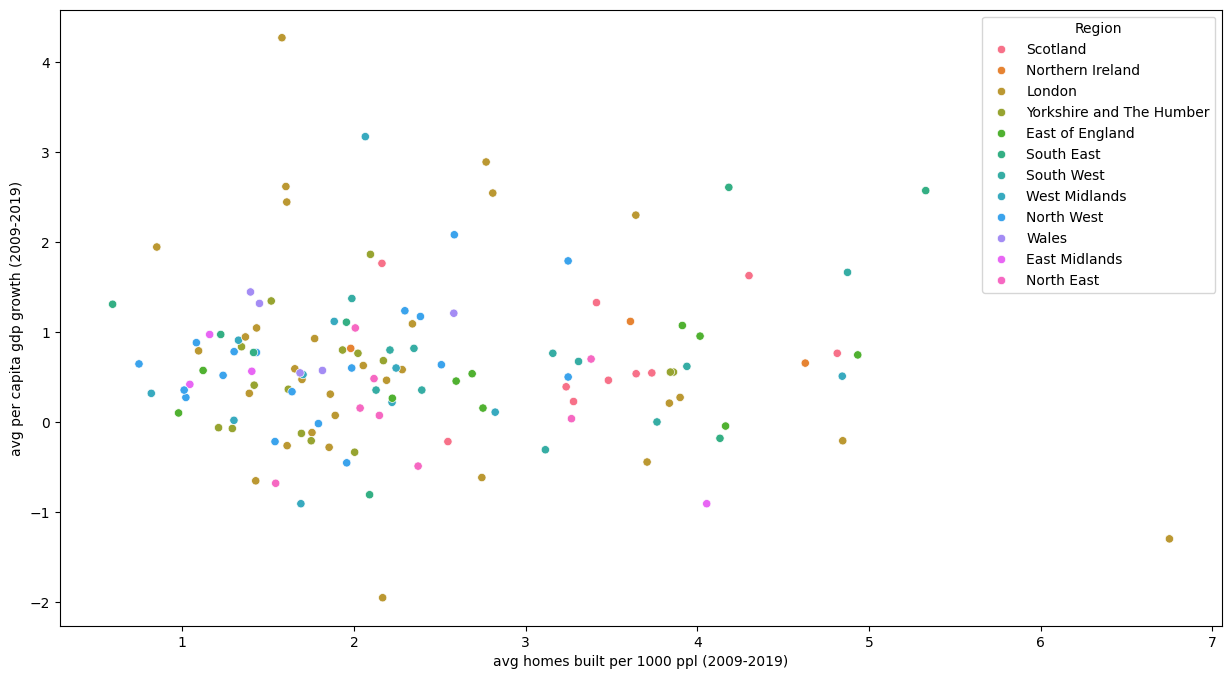

In [29]:
plt.figure(figsize=(15, 8))  # setting the figure size for better visibility/
sns.scatterplot(data=df_big, x='avg homes built per 1000 ppl (2009-2019)', y='avg per capita gdp growth (2009-2019)', hue='Region')
plt.show()


Increasing density doesn't actually result in higher gdp growth for an area. 